In [249]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import datetime

In [250]:
#import raw data csv

input_data_file = "../../RAW DATA/SURVEY RAW DATA 2_CSV.CSV"

# Read in file and store in Pandas data frame
survey_data_df = pd.read_csv(input_data_file)
survey_data_df 


,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,0,6.0,0.0,NaN,NaN,Possibly,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,0,7.0,2.0,NaN,NaN,Possibly,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,1,0.0,1.0,NaN,NaN,Yes,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, because it doesn't matter",No change,No,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,0,2.0,2.0,NaN,NaN,No,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,0,9.0,7.0,NaN,NaN,Possibly,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,0,5.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,0,6.0,5.0,NaN,NaN,Possibly,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [251]:
# replace "True" and "false" values in CSV to match the rest of the data 
survey_data_df['3_TECH_ORG'].replace('TRUE',"1", inplace=True)
survey_data_df['3_TECH_ORG'].replace('FALSE',"0", inplace=True)

survey_data_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,0,6.0,0.0,NaN,NaN,Possibly,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,0,7.0,2.0,NaN,NaN,Possibly,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,1,0.0,1.0,NaN,NaN,Yes,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, because it doesn't matter",No change,No,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,0,2.0,2.0,NaN,NaN,No,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,0,9.0,7.0,NaN,NaN,Possibly,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,0,5.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,0,6.0,5.0,NaN,NaN,Possibly,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [252]:
#Filter to only include tech workers
tech_mental_health = survey_data_df.loc[survey_data_df["3_TECH_ORG"]=="1"]
pd.options.display.max_columns = 27
tech_mental_health

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,0,6.0,0.0,NaN,NaN,Possibly,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,0,7.0,2.0,NaN,NaN,Possibly,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,1,0.0,1.0,NaN,NaN,Yes,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,0,9.0,5.0,NaN,NaN,No,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,1,6.0,4.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,No,0,8.0,3.0,NaN,NaN,No,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,0,9.0,7.0,NaN,NaN,Possibly,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,0,5.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America


In [253]:
# Check total nuber of questions by year for analysis (11 and 12)
tech_mental_health.groupby("YEAR").count()

,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,
2017,501,501,501,501,445,501,501,501,501,501,501,501,0,0,501,204,501,501,501,501,495,501,346,336,501
2018,266,266,266,266,236,266,266,266,266,266,266,266,0,0,266,122,266,266,266,266,265,266,205,200,266
2019,207,207,207,207,188,207,207,207,207,207,207,207,0,0,207,86,207,207,207,207,204,207,126,126,207
2020,97,97,97,97,83,97,97,97,97,97,97,97,0,0,97,25,97,97,97,97,96,97,38,37,97


In [254]:
# 11 and 12 have the same total df for use later 
total_mental_df = pd.DataFrame(tech_mental_health.groupby("YEAR")["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"].count())
total_mental_df

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH
YEAR,
2017,501
2018,266
2019,207
2020,97


In [255]:
# 11 and 12 have the same total df for use later 
total_physical_df = pd.DataFrame(tech_mental_health.groupby("YEAR")["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"].count())
total_physical_df

,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,
2017,501
2018,266
2019,207
2020,97


In [266]:
#TBD - What is the level of importance placed on mental health placed by employers over time?
#Only find values in "12_IMPORTANCE_EMPLOY_MENTAL_HEALTH" > 5

# Display all columns to check data
pd.options.display.max_columns = 27

# Create DF with Question 12 values >5
importance_mental_value = tech_mental_health.loc[tech_mental_health["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"] >= 6 ]
importance_mental_value.head(15)

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,0,10.0,10.0,NaN,NaN,Yes,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
7,2017,0,26-100,1,Yes,No,No,No,I don't know,Yes,0,10.0,8.0,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,2.0,38.0,Female,United States of America,Georgia,White,United States of America
12,2017,0,More than 1000,1,No,No,No,No,I don't know,Maybe,1,7.0,7.0,NaN,NaN,No,NaN,Sometimes,Not applicable to me,4.0,23.0,Male,Russia,NaN,NaN,Russia
23,2017,0,5-Jan,1,No,NaN,No,No,I don't know,Maybe,1,6.0,7.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,25.0,Male,United Kingdom,NaN,NaN,United Kingdom
42,2017,0,500-1000,1,Yes,Yes,I don't know,I don't know,I don't know,Maybe,0,9.0,9.0,NaN,NaN,Yes,Yes,Never,Often,4.0,33.0,male,United States of America,Colorado,White,United States of America
43,2017,0,100-500,1,Yes,Yes,Yes,Yes,Yes,No,0,8.0,8.0,NaN,NaN,Possibly,NaN,Often,Often,4.0,40.0,Male,United States of America,Virginia,Black or African American,United States of America
50,2017,0,25-Jun,1,Yes,No,No,I don't know,I don't know,No,0,6.0,7.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,42.0,Female,United States of America,Illinois,White,United States of America
51,2017,0,25-Jun,1,Yes,Yes,Yes,No,Yes,Yes,1,10.0,8.0,NaN,NaN,Yes,Yes,Often,Often,3.0,37.0,Genderfluid,Canada,NaN,NaN,Canada
53,2017,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,Maybe,0,8.0,7.0,NaN,NaN,Don't Know,NaN,Not applicable to me,Not applicable to me,4.0,47.0,Male,United Kingdom,NaN,NaN,United Kingdom
57,2017,0,100-500,1,Yes,Yes,Yes,I don't know,Yes,Maybe,0,7.0,7.0,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,2.0,37.0,M,United Kingdom,NaN,NaN,United Kingdom


In [29]:
# Count total responses for %
#importance_mental_total = importance_mental_value["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"].count()
#importance_mental_total

In [257]:
# Create DF with Question 11 values >5
importance_physical_value = tech_mental_health.loc[tech_mental_health["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"] >= 6 ]
importance_physical_value

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,0,6.0,0.0,NaN,NaN,Possibly,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,0,7.0,2.0,NaN,NaN,Possibly,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,0,9.0,5.0,NaN,NaN,No,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,0,10.0,10.0,NaN,NaN,Yes,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2020,0,More than 1000,1,Yes,Yes,Yes,Yes,Yes,Maybe,1,7.0,9.0,NaN,NaN,Possibly,NaN,Not applicable to me,Not applicable to me,2.0,39.0,Male,United States of America,Massachusetts,White,United States of America
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,1,6.0,4.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,No,0,8.0,3.0,NaN,NaN,No,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,0,9.0,7.0,NaN,NaN,Possibly,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines


In [258]:
#Create DF of count of MENTAL health values for chart
importance_mental_by_year = pd.DataFrame(importance_mental_value.groupby('YEAR')['12_IMPORTANCE_EMPLOY_MENTAL_HEALTH'].count())
importance_mental_by_year

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH
YEAR,
2017,226
2018,111
2019,82
2020,42


In [259]:
percent_mental_by_year = (importance_mental_by_year / total_mental_df) *100
percent_mental_by_year

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH
YEAR,
2017,45.109780
2018,41.729323
2019,39.613527
2020,43.298969


In [260]:
#Create DF of count of PHYSICAL health values for chart
importance_physical_by_year = pd.DataFrame(importance_physical_value.groupby('YEAR')['11_IMPORTANCE_EMPLOY_PHYS_HEALTH'].count())
importance_physical_by_year

,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,
2017,334
2018,165
2019,134
2020,68


In [261]:
percent_phys_by_year = (importance_physical_by_year / total_physical_df) * 100
percent_phys_by_year

,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,
2017,66.666667
2018,62.030075
2019,64.734300
2020,70.103093


In [262]:
#Merge dataset for chart
mental_and_physical_df = pd.merge(importance_mental_by_year, importance_physical_by_year, on='YEAR')
mental_and_physical_df

total_df = pd.merge(mental_and_physical_df,total_physical_df, on="YEAR")
total_df

total_df_1 = pd.merge(total_df,percent_mental_by_year, on="YEAR")
total_df_1 

final_df = pd.merge(total_df_1,percent_phys_by_year, on="YEAR")
final_df

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH_x,11_IMPORTANCE_EMPLOY_PHYS_HEALTH_x,11_IMPORTANCE_EMPLOY_PHYS_HEALTH_y,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH_y,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,,,,,
2017,226,334,501,45.109780,66.666667
2018,111,165,266,41.729323,62.030075
2019,82,134,207,39.613527,64.734300
2020,42,68,97,43.298969,70.103093


Text(0.5, 1.0, 'IMOPRTANCE YOUR EMPLOYER PUTS ON MENTAL HEALTH: RESPONSES  >= 5')

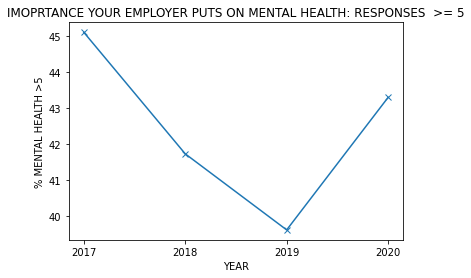

In [263]:
#imp_value.to_csv('Output_CSV/weather_data.csv')
x_values = ["2017", "2018", "2019", "2020"]
y_value = final_df["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH_y"]
plt.plot(x_values, y_value, marker = 'x')


plt.xlabel("YEAR")
plt.ylabel("% MENTAL HEALTH >5")
plt.title("IMOPRTANCE YOUR EMPLOYER PUTS ON MENTAL HEALTH: RESPONSES  >= 5")

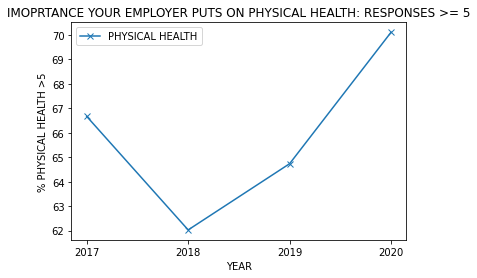

In [264]:
y_value_2 = final_df["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"]
plt.plot(x_values, y_value_2, marker = 'x', label = "PHYSICAL HEALTH")


plt.xlabel("YEAR")
plt.ylabel("% PHYSICAL HEALTH >5")
plt.title("IMOPRTANCE YOUR EMPLOYER PUTS ON PHYSICAL HEALTH: RESPONSES >= 5")
plt.legend()

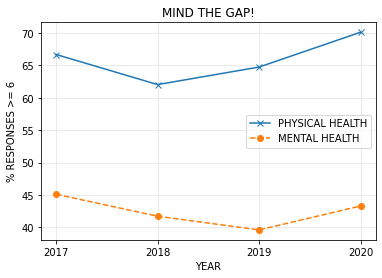

In [267]:
x_values = ["2017", "2018", "2019", "2020"]

plt.plot(x_values, y_value_2, marker = 'x', label = "PHYSICAL HEALTH")
plt.plot(x_values, y_value, marker = 'o',linestyle = "dashed", label = "MENTAL HEALTH" )
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)
plt.xlabel("YEAR")
plt.ylabel("% RESPONSES >= 6")
plt.title("MIND THE GAP!")
plt.legend()
plt.savefig("Images/IMPORTANCE MENTAL VS PHSICAL great equal 6")
plt.show()
